<a href="https://colab.research.google.com/github/johnny9210/Stock/blob/main/Stock_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 450kB 56.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
from konlpy.tag import *
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
okt = Okt()
kkma = Kkma()

In [54]:
def word_cloud(name,date):
  data = pd.read_csv('/content/news.csv',encoding='utf-8')

  noun = okt.nouns(''.join(data[(data['name']==name)&(data['date']==date)]['content']))

  for i, v in enumerate(noun):
    if len(v)>3:
      noun.pop(i)

  count=Counter(noun)


  noun_list = count.most_common(30)
  list_=[]
  for v in noun_list:
    list_.append(v)

  wordcloud = WordCloud(font_path='/content/NanumGothic.ttf',width=800,height=1000,background_color='black')
  wordcloud.generate_from_frequencies(dict(list_))
  plt.imshow(wordcloud)

  return wordcloud.to_file('word.png')

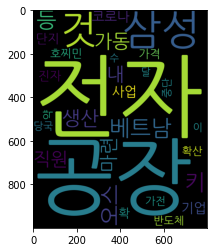

In [57]:
word_cloud('삼성전자','2021.07.14')

In [4]:
data = pd.read_csv('/content/news.csv',encoding='utf-8')

In [5]:
data

,code,name,date,subject,content
0,5930,삼성전자,2021.07.17,[단독] 삼성 대미 반도체 투자 결국 6개월~1년 지연,텍사스 제2후보지역 착공 내년 1Q\n제1후보지서는 올해 2Q 공사 목표\n상업가동...
1,5930,삼성전자,2021.07.16,"인텔, '파운드리' 공격 투자 지속..삼성전자도 '경계'","""인텔, 글로벌파운드리 인수 협상 진행 중""\n인수대금 약 34조 추정..인텔 역사..."
2,5930,삼성전자,2021.07.16,"TSMC, 삼성과 격차 더 벌리는데...총수 장기 부재로 전략적 결단 실종",[샌드위치 신세된 삼성]\nTSMC 2분기 영업익 6조 육박\n후발주자 추격 멀찍이...
3,5930,삼성전자,2021.07.16,"""기업가치 10조 잠재력 있다"" 삼성 600억 투자한 회사는?",인게임 앱 제작 지원 업체\n메타버스 생태계 활용성 주목\n\n삼성전자의 투자 자회...
4,5930,삼성전자,2021.07.16,"""삼성, 美 제2파운드리 부지로 텍사스 중부 검토"" -로이터",미국 텍사스주 오스틴에 있는 삼성전자 팹 공장/사진=삼성전자 홈페이지\n삼성전자가 ...
...,...,...,...,...,...
504,68270,셀트리온,2021.06.14,엎치락뒤치락 코스피…셀트리온 3형제 강세,셀트리온 장 초반 4%대 상승\n코스닥 상승 출발\n[이미지출처=연합뉴스]\n\n\...
505,68270,셀트리온,2021.06.14,"셀트리온 ""코로나19 치료제 렉키로나, 3상서 효능 안전성 입증""",셀트리온 코로나 치료제 임상 3상서 중증 악화율 70% 이상 감소.[사진 = 연합]...
506,68270,셀트리온,2021.06.14,[속보]셀트리온 '렉키로나' 글로벌 임상 3상 효능·안전성 입증,[머니투데이 안정준 기자] 셀트리온은 코로나19 항체 치료제 '렉키로나'의 글로벌 ...
507,68270,셀트리온,2021.06.14,"[속보]셀트리온 “렉키로나주, 중증환자 발생률 70% 감소시켜”",“고위험군 환자 대상으로는 72% 감소”\n[이데일리 왕해나 기자] 셀트리온(068...


In [11]:
data[(data['name']=='삼성전자')&(data['date']=='2021.07.16')]['content']

1     "인텔, 글로벌파운드리 인수 협상 진행 중"\n인수대금 약 34조 추정..인텔 역사...
2     [샌드위치 신세된 삼성]\nTSMC 2분기 영업익 6조 육박\n후발주자 추격 멀찍이...
3     인게임 앱 제작 지원 업체\n메타버스 생태계 활용성 주목\n\n삼성전자의 투자 자회...
4     미국 텍사스주 오스틴에 있는 삼성전자 팹 공장/사진=삼성전자 홈페이지\n삼성전자가 ...
5     가용 인력도 7000명에서 3000명으로 줄여\n직원 출퇴근 금지 조치에 텐트 등 ...
6     사진=연합뉴스\n\n\n코스피가 기관과 외국인의 매도에 하락 마감했다. 신종 코로나...
7     사진제공=삼성전자\n장마가 물러가자 본격적인 무더위가 시작됐다. 35도를 웃도는 기...
8     [이데일리 김연지 기자] 와이아이케이(232140)는 삼성전자(005930)와 반도...
9     인텔의 파운드리 인수 움직임에\n한국 에이디칩스 주가 22%↑\n삼성전자·SK하이닉...
10    남미 아프리카 등서 점유율 빠르게 높여\n1위는 점유율 19%로 삼성전자가 차지해 ...
11    미국 캘리포니아주 산타클라라의 인텔 본사 [사진 출처 = 연합뉴스]\n인텔이 세계 ...
12    지난 4월23일(현지시간) 인도 카슈미르주 잠무의 화장터에서 코로나19로 숨진 사람...
13    엑시콘은삼성전자와 43억원 규모의 반도체 검사장비(번인 보드) 공급 계약을 체결했다...
14    삼성전자(005930)가 외국인과 기관의 동반 매수에 8만원대를 회복한 지 하루 만...
15    [주식 1주 증정하는 이마트24 '주식도시락' 판매 첫날 완판되며 인기몰이]\n\n...
16    필라델피아 반도체 지수, 반도체 투심 위축되며 2.17%↓\n[이데일리 이은정 기자...
17    사진제공=삼성전자\n\n[서울경제]\n\n삼성전자(005930) 주가가 16일 장 ...
18    [이데일리 박정수 기자] 키움증권은 16일 케이씨텍(281820)에 대해 삼

In [12]:
noun = okt.nouns(''.join(data[(data['name']=='삼성전자')&(data['date']=='2021.07.16')]['content']))

for i, v in enumerate(noun):
  if len(v)<3:
    noun.pop(i)

count=Counter(noun)


In [ ]:
count

In [30]:
noun_list = count.most_common(30)
list_=[]
for v in noun_list:
  list_.append(v)

In [32]:

icon = Image.open('/content/2724203D55A4B42402.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)


pig=np.array(mask)

In [35]:
wordcloud = WordCloud(font_path='/content/NanumGothic.ttf',width=800,height=1000,background_color='black', mask=pig)

TypeError: ignored

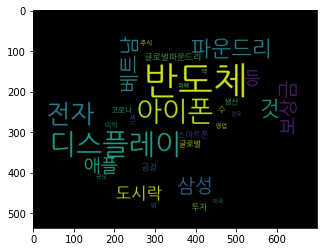

In [34]:
wordcloud.generate_from_frequencies(dict(list_))
plt.imshow(wordcloud)

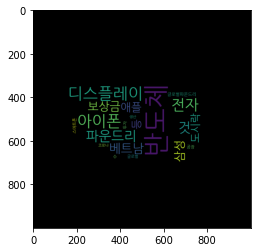

In [29]:
wordcloud.to_file('word.png')
plt.imshow(wordcloud)